# Квадратурные формулы

### Перовообразная от функции f(x) = x*sin(x), равна: F(x) = sin(x) − x*cos(x) + C;

# График функции первообразной (при С = 0)
![title](desmos-graph.png)

## Задание 1

Аналитический расчет:	-14.497391971080422

СРАВНЕНИЕ МЕТОДА ТРАПЕЦИИ
Квадратурная формула:	-13.516809002826289
Абсолютная погрешность:	0.9805829682541329
lib Integrate.trapz:	352.31197211126624
Абсолютная погрешность:	366.8093640823467

СРАВНЕНИЕ МЕТОДА СИМПСОНА
Квадратурная формула:	-14.551780137103094
Абсолютная погрешность:	0.05438816602267238
lib Integrate.simps:	368.5562343201866
Абсолютная погрешность:	383.05362629126705


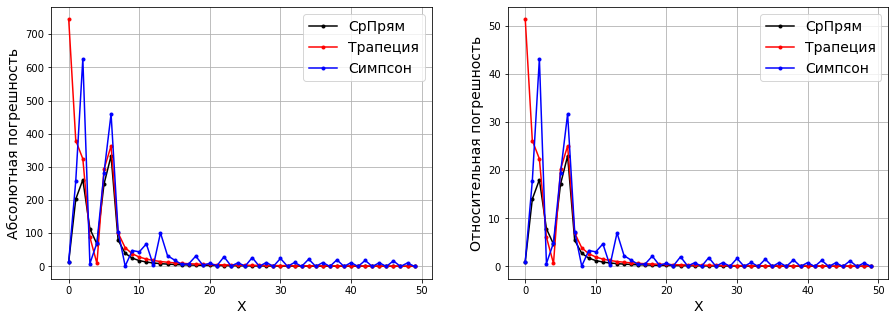

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.integrate as integrate
import math

# первые 3 const должны быть Integer
START = -20
END = 20
INTERVALS = 50 # количество разбиваемых интервалов (при tip = 3 должно быть четным)
TIP = 1 # tip = 1: Метод средних прямоугольников; tip = 2: Метод трапеции; tip = 3: метод Симпсона

# Первообразная от fun
def Fun(x):
    return math.sin(x) - x * math.cos(x)

# Подъинтегральная функция
def fun(x):
    return x * math.sin(x)

# Методы Ньютона-Котеса
def method_NK(a, b, n, tip): # a - is start of range, b - is end of range, n - is count of intervals
    h = (b - a) / n
    sum = 0
    if tip == 1 or tip == 2:
        for i in range(n):
            # tip = 1: Метод средних прямоугольников
            if tip == 1:
                sum += h * fun(a + (2*i+1) * h/2)
            # tip = 2: Метод трапеции
            else:
                sum += (h/2) * (fun(a + i*h) + fun(a + h*(i+1)))
    elif tip == 3:
        # Последний тип - метод Симпсона
        # !!! КОЛИЧЕСТВО ИНТЕРВАЛОВ ДОЛЖНО БЫТЬ ЧЕТНЫМ => N % 2 = 0
        for i in range(round(n/2)):
            sum += (h/3) * (fun(a + (2*(i+1)-2)*h) + 4*fun(a + (2*(i+1)-1)*h) + fun(a + (2*(i+1))*h))
    return sum

#MAIN-----------------------------------
relationOfRec = []
relationOfTrap = []
relationOfSimpson = []

for i in range(INTERVALS):
    relationOfRec.append(abs(Fun(END) - Fun(START) - method_NK(START, END, i+1, 1)))
    relationOfTrap.append(abs(Fun(END) - Fun(START) - method_NK(START, END, i+1, 2)))
    relationOfSimpson.append(abs(Fun(END) - Fun(START) - method_NK(START, END, i+1, 3)))
    
x = [i for i in range(INTERVALS)]
fig = plt.figure(figsize=(15,5))

# Построение абсолютной погрешности
ax1 = fig.add_subplot(121)
ax1.plot(x, relationOfRec, linestyle='-', marker='.', color='black', label='СрПрям')
ax1.plot(x, relationOfTrap, linestyle='-', marker='.', color='red', label='Трапеция')
ax1.plot(x, relationOfSimpson, linestyle='-', marker='.', color='blue', label='Симпсон')
ax1.set_xlabel('X', fontsize=14)
ax1.set_ylabel('Абсолютная погрешность', fontsize=14)
ax1.legend(fontsize=14)
ax1.grid()

# Построение относительной погрешности
ax2 = fig.add_subplot(122)
ax2.plot(x, [val/abs(Fun(END)-Fun(START)) for val in relationOfRec], linestyle='-', marker='.', color='black', label='СрПрям')
ax2.plot(x, [val/abs(Fun(END)-Fun(START)) for val in relationOfTrap], linestyle='-', marker='.', color='red', label='Трапеция')
ax2.plot(x, [val/abs(Fun(END)-Fun(START)) for val in relationOfSimpson], linestyle='-', marker='.', color='blue', label='Симпсон')
ax2.set_xlabel('X', fontsize=14)
ax2.set_ylabel('Относительная погрешность', fontsize=14)
ax2.legend(fontsize=14)
ax2.grid()

# ---Сравнения---
print('Аналитический расчет:\t' + str(Fun(END) - Fun(START)) + '\n')
print('СРАВНЕНИЕ МЕТОДА ТРАПЕЦИИ')
print('Квадратурная формула:\t' + str(method_NK(START, END, INTERVALS, 2)))
print('Абсолютная погрешность:\t' + str(abs(Fun(END) - Fun(START) - method_NK(START, END, INTERVALS, 2))))
dx = (END - START) / INTERVALS
x1 = np.arange(START, END, dx)
y = np.array([fun(x) for x in x1])
print('lib Integrate.trapz:\t' + str(integrate.trapz(x,y)))
print('Абсолютная погрешность:\t' + str(abs(Fun(END) - Fun(START) - integrate.trapz(x,y))))
print('\nСРАВНЕНИЕ МЕТОДА СИМПСОНА')
print('Квадратурная формула:\t' + str(method_NK(START, END, INTERVALS, 3)))
print('Абсолютная погрешность:\t' + str(abs(Fun(END) - Fun(START) - method_NK(START, END, INTERVALS, 3))))
print('lib Integrate.simps:\t' + str(integrate.simps(x,y)))
print('Абсолютная погрешность:\t' + str(abs(Fun(END) - Fun(START) - integrate.simps(x,y))))
#---------------------------------------

## Задание 2 - Построение графика первообразной

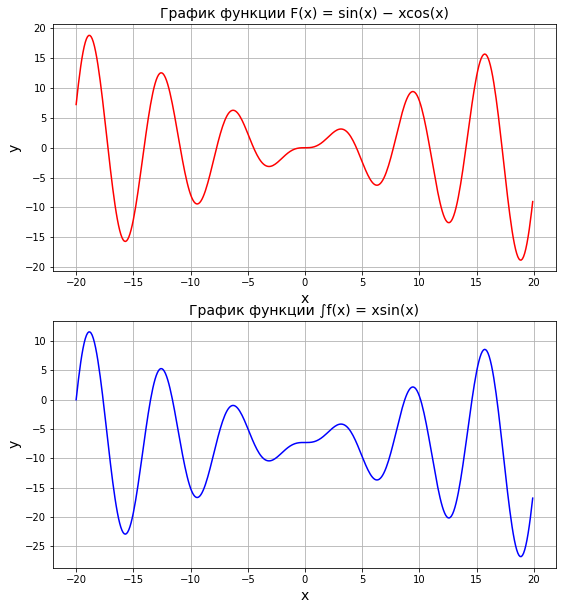

In [2]:
# Строим через первообразную, должен получиться такой же, как и в заголовке
# Расчет точек
x2 = [i/10 for i in range(10*START, 10*END)]
y2 = [Fun(i) for i in x2]
# Отрисовка по расчитанным точкам
plt.figure(figsize=(9,10))
plt.subplot(2, 1, 1)
plt.title('График функции F(x) = sin(x) − xcos(x)', fontsize=14) # заголовок
plt.xlabel('x', fontsize=14) # ось абсцисс
plt.ylabel('y', fontsize=14) # ось ординат
plt.grid(True) # включение отображения сетки
plt.plot(x2, y2, 'r-') # построение графика

# Строим через метод средних прямоугольников
# Расчет точек
y3 = [method_NK(START, i, INTERVALS, 1) for i in x2]
# Отрисовка по расчитанным точкам
plt.subplot(2, 1, 2)
plt.title('График функции ∫f(x) = xsin(x)', fontsize=14) # заголовок
plt.xlabel('x', fontsize=14) # ось абсцисс
plt.ylabel('y', fontsize=14) # ось ординат
plt.grid(True) # включение отображения сетки
plt.plot(x2,y3, 'b-') # построение графика